<a href="https://colab.research.google.com/github/Carla9711/Machine-Learning---Classification/blob/main/Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Classification

In [129]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display all rows when viewing dataframe
pd.set_option('display.max_rows', None)

# Stroke Prediction Dataset

## Data Dictionary

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

## Load Data

In [131]:
path = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/healthcare-dataset-stroke-data.csv'

In [132]:
df_stroke = pd.read_csv(path)

In [133]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [134]:
df_stroke.shape

(5110, 12)

## Dataset 2 Q&A

1. [Source of data](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

2. Brief description of data
  * Health and demograohic data collected by WHO

3. What is the target?
  * Whether a patient is likely to have a stroke or not

4. What does one row represent? (A person? A business? An event? A product?)
  * One row represents a person

5. Is this a classification or regression problem?
  * Classification

6. How many features does the data have?
  * 11

7. How many rows are in the dataset?
  * 5110

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
 * None so far

## Clean Data

* Delete unnecessary columns.
* Delete duplicate rows.
* Identify and addressed missing values.
* Identify and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats).
* Produce univariate visuals for the target and all features.
* Identify outliers.


In [135]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [136]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [137]:
df_stroke['id'].nunique()

5110

* Each row represents a person with a unique id
* id will be dropped because it's not a useful machine learning feature

In [138]:
# drop unnecessary columns
df_stroke.drop(columns=['id'], inplace=True)

In [139]:
# check number of duplicates
df_stroke.duplicated().sum()

0

* There are no duplicate rows to delete

In [140]:
# check categorical columns for inconsistencies
# check value counts of categorical data
cat_col = df_stroke.select_dtypes('object').columns
for col in cat_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')

Value Counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




* There's one row in the dataset with Gender=Other
* This row will be dropped because there's not adequate data to train and test the model on this sub-category

In [141]:
# drop row where gender = Other
df_stroke.drop(df_stroke[df_stroke['gender']=='Other'].index,inplace=True)

In [142]:
df_stroke['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [143]:
# check impossible numerical values
df_stroke.describe().loc[['min','mean','max']]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


* Age of 0.08 seems unlikely

In [144]:
# check age value counts
df_stroke['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
45.00     85
79.00     85
53.00     85
55.00     83
50.00     83
59.00     80
31.00     79
49.00     79
56.00     77
37.00     76
61.00     76
47.00     75
44.00     75
62.00     74
40.00     74
63.00     74
41.00     73
60.00     72
38.00     72
39.00     71
42.00     71
32.00     71
80.00     70
43.00     70
34.00     68
58.00     68
48.00     66
5.00      65
23.00     64
65.00     62
46.00     62
71.00     61
26.00     61
18.00     60
66.00     60
17.00     60
81.00     60
20.00     59
8.00      58
13.00     57
25.00     57
33.00     57
82.00     56
2.00      55
30.00     55
24.00     55
27.00     55
14.00     54
35.00     54
28.00     54
69.00     54
75.00     53
64.00     53
36.00     52
16.00     52
29.00     51
76.00     50
19.00     50
67.00     49
21.00     47
68.00     47
73.00     46
3.00      46
22.00     45
72.00     45
15.00     45
70.00     45
12.00     45
77.00     42
74.00     40
9.00      38
11.00     36

* Most age values are integers
* There are some age values between 0 and 2 with float data types (i.e. decimal places). These are hard to intepret
* For this reason, age values below 1.5 will be replaced by 1 and age values between 1.5 and 2 will be replaced by 2

In [145]:
# replace age below 1.5 with 1 and age between 1.5 and 2 with 2
df_stroke.loc[df_stroke['age']<1.5,'age'] = 1
df_stroke.loc[(df_stroke['age']>=1.5) & (df_stroke['age']<2),'age'] = 2

In [146]:
# check age value counts again
df_stroke['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
51.0     86
53.0     85
1.0      85
45.0     85
79.0     85
55.0     83
50.0     83
59.0     80
49.0     79
31.0     79
56.0     77
61.0     76
37.0     76
44.0     75
47.0     75
40.0     74
63.0     74
62.0     74
41.0     73
38.0     72
60.0     72
42.0     71
32.0     71
39.0     71
80.0     70
43.0     70
58.0     68
34.0     68
48.0     66
5.0      65
23.0     64
65.0     62
46.0     62
26.0     61
71.0     61
17.0     60
66.0     60
18.0     60
81.0     60
20.0     59
8.0      58
13.0     57
25.0     57
33.0     57
82.0     56
27.0     55
30.0     55
24.0     55
35.0     54
14.0     54
69.0     54
28.0     54
75.0     53
64.0     53
16.0     52
36.0     52
29.0     51
19.0     50
76.0     50
67.0     49
21.0     47
68.0     47
73.0     46
3.0      46
72.0     45
15.0     45
12.0     45
70.0     45
22.0     45
77.0     42
74.0     40
9.0      38
11.0     36
10.0     35
4.0      34
7.0      32
6.0      24
Name: age, dtype

In [147]:
# identify missing values
df_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* There are 201 missing bmi values

In [148]:
# create EDA copy
# replace missing bmi values with -1
df_eda = df_stroke.copy()
df_eda['bmi'].fillna(-1, inplace=True)

In [149]:
# confirm missing values have been replaced
df_eda['bmi'].isna().sum()

0

## Univariate Vizualizations

In [150]:
# create dataframe of numeric columns
col_num = df_eda.select_dtypes('number').drop(columns=['hypertension','heart_disease','stroke'])
col_num.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,-1.0
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


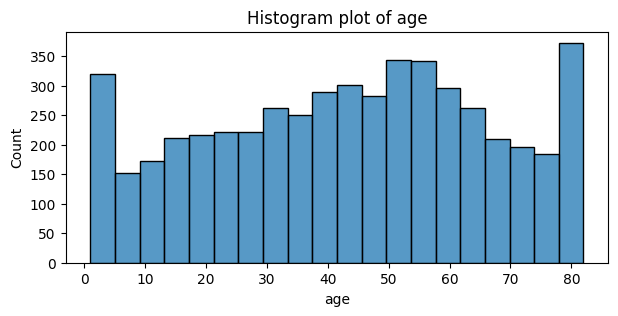

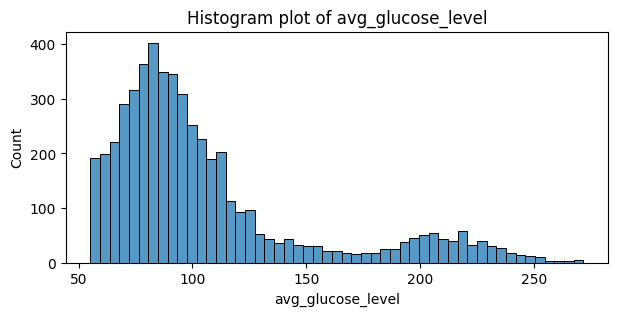

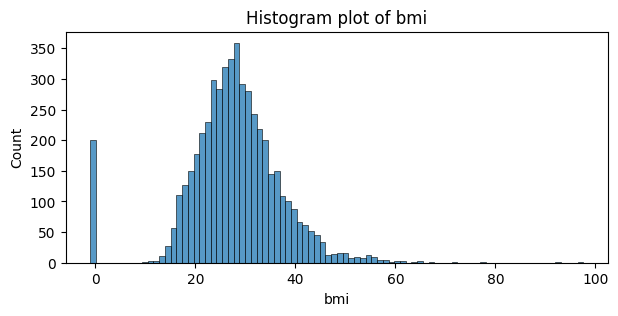

In [151]:
# Histogram plot of all numeric columns
for i, col in enumerate(col_num.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.histplot(x=col, data=col_num,bins='auto')
    ax.set_title(f"Histogram plot of {col}")

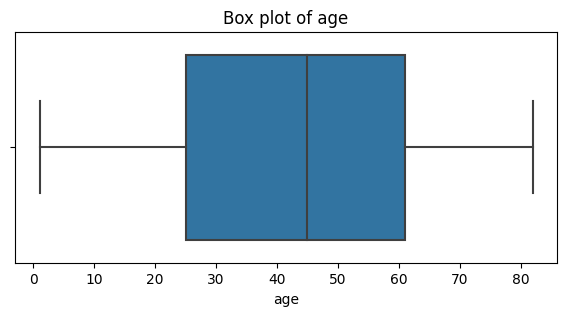

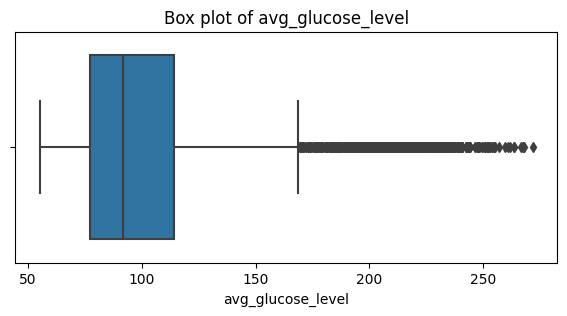

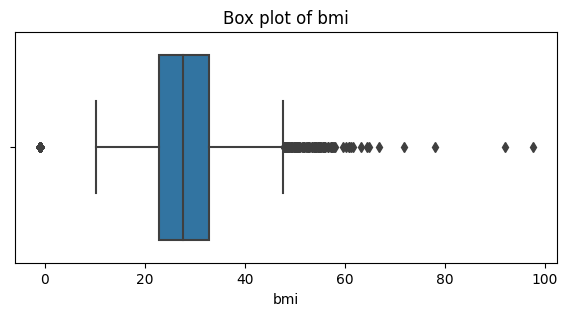

In [152]:
# Box plot of all numeric columns
for i, col in enumerate(col_num.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.boxplot(x=col, data=col_num)
    ax.set_title(f"Box plot of {col}")

**Numeric univariate vizualization intepretations**

Age
  * Normal distribution between 2 and 78
  * Higher value counts between 1-2 and 78-82

avg_glucose_level
  * Two bimodal distributions
  * Most of the data lies between 55 and 125

bmi
  * Uniform distribution
  * Some outliers with bmi's > 45  

In [153]:
# create dataframe of ordinal and nominal columns
col_cat = df_eda[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']]
col_cat.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1


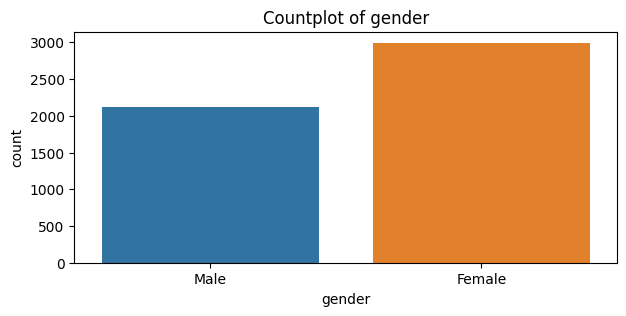

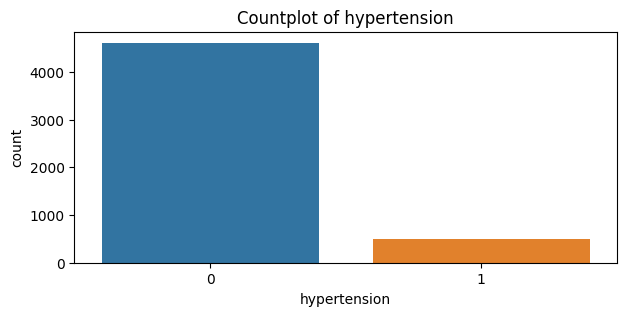

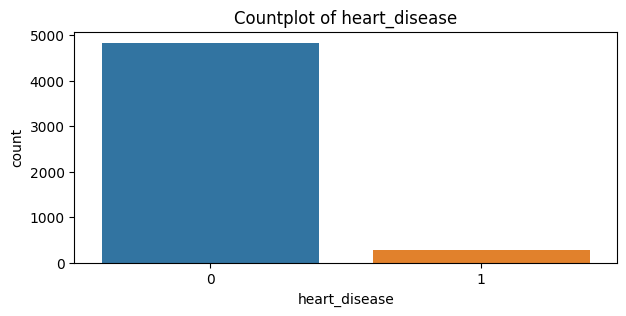

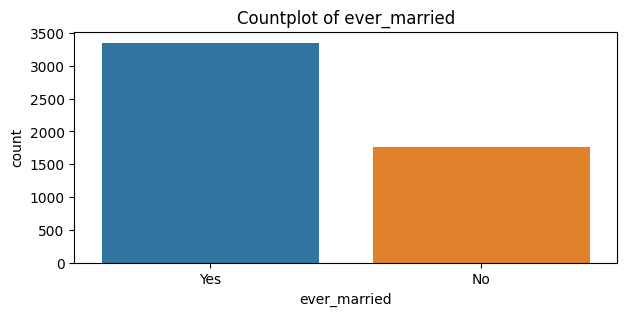

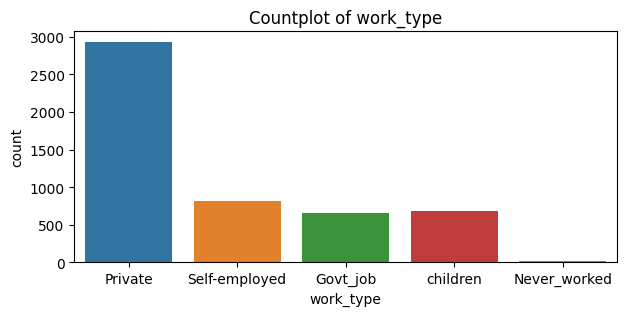

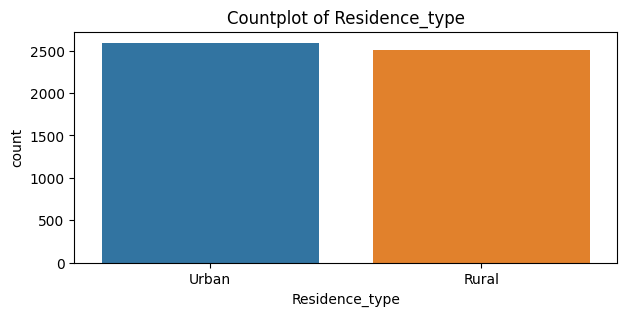

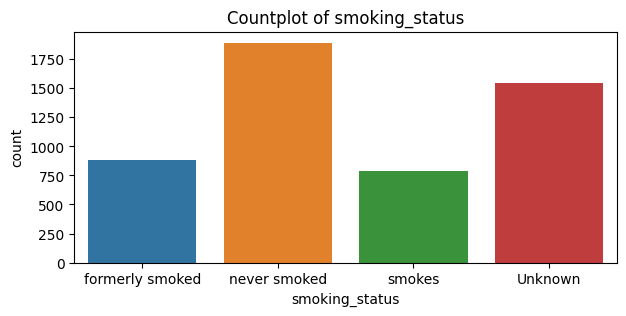

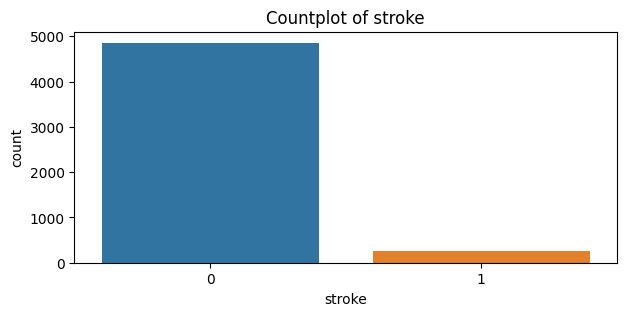

In [154]:
# Countplot of all categorical columns
for i, col in enumerate(col_cat.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.countplot(x=col, data=col_cat)
    ax.set_title(f"Countplot of {col}")

**Categorical univariate vizualization intepretations**

gender
  * More females than males

hypertention
  * More patients without hypertention than with hypertention

heart disease
  * More patients without heart disease than with heart disease

ever_married
  * More patients married than never married

work_type
  * Most patients have a Private work type

Residential_type
  * Somewhat even split between Urban and Rural

smoking_status
  * Most patients never smoked than smoked
  * There's also a large portion of patients with an unknown smoking status

stroke (target)
  * Most patients did not have a stroke compared to those that did have a stroke



# Adult income dataset

[Source: Data Dictionary](https://www.kaggle.com/code/jieyima/income-classification-model)

## Data Dictionary

* age
  * Age of an individual

* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  * Individual work category

* fnlwgt: final weight
  * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly by the Population Division at the Census Bureau.

* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  * Individual's highest education degree

* education-num: number of education year, continuous.
  * Individual's year of receiving education

* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 * Individual marital status

* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  * Individual's occupation

* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  * Individual's relation in a family

* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  * Race of Individual

* sex: Female, Male.

* capital-gain
* capital-loss
* hours-per-week:
  * Individual's working hour per week

* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  * Individual's native country








In [155]:
path1 = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/adult.csv'
df_adult = pd.read_csv(path1)

In [156]:
df_adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [157]:
df_adult.shape

(48842, 15)

## Dataset 1 Q&A

1. [Source of data](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

2. Brief description of data
  * Demographic and income data colected in a census

3. What is the target?
  * An individuals income

4. What does one row represent? (A person? A business? An event? A product?)
  * One row represents a person

5. Is this a classification or regression problem?
  * Classification

6. How many features does the data have?
  * 14

7. How many rows are in the dataset?
  * 48842

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  * Some columns such as fnlwgt (final weight) might be hard to intepret as it's an attribute specific to the United States